      PRCP   TAVG  Year  Month
0     10.7    NaN  1960     10
1     28.0    NaN  1960     11
2     18.6    NaN  1960     12
3      2.6    NaN  1961      1
4      5.9    NaN  1961      2
5     50.6    NaN  1961      3
6     40.4    NaN  1961      4
7    127.3    NaN  1961      5
8     54.4    NaN  1961      6
9     81.0    NaN  1961      7
10    44.5    NaN  1961      8
11    78.9    NaN  1961      9
12    91.0    NaN  1961     10
13    30.0    NaN  1961     11
14    63.0    NaN  1961     12
15     5.1    NaN  1962      1
16    44.4    NaN  1962      2
17    55.9    NaN  1962      3
18    34.5    NaN  1962      4
19   201.3    NaN  1962      5
20   120.4    NaN  1962      6
21   155.0    NaN  1962      7
22   115.3    NaN  1962      8
23    90.7    NaN  1962      9
24    41.9    NaN  1962     10
25    19.4    NaN  1962     11
26     1.3    NaN  1962     12
27     2.1 -14.74  1963      1
28     7.2 -10.00  1963      2
29    33.5   1.69  1963      3
30    56.2   9.35  1963      4
31   130

<Figure size 1200x600 with 0 Axes>

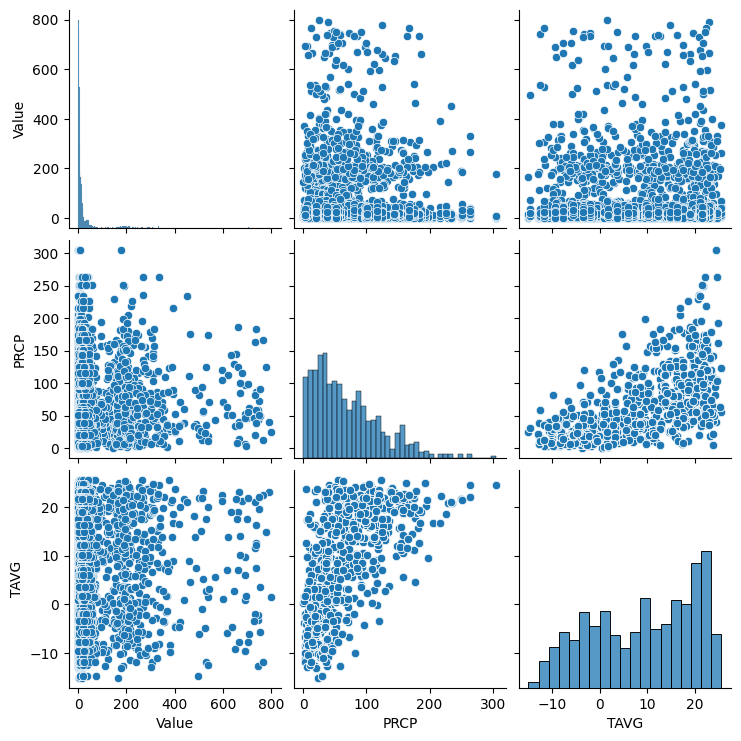

      Year  Month  Commodity   Value
0     1960      2     BARLEY    0.84
1     1960      2       CORN    0.82
2     1960      2   FLAXSEED    3.06
3     1960      2        HAY   43.00
4     1960      2       OATS    0.60
5     1960      2        RYE    0.92
6     1960      2   SOYBEANS    1.89
7     1960      2      WHEAT    5.69
8     1960      3     BARLEY    0.83
9     1960      3       CORN    0.85
10    1960      3   FLAXSEED    2.92
11    1960      3        HAY   43.00
12    1960      3       OATS    0.61
13    1960      3        RYE    0.86
14    1960      3   SOYBEANS    1.89
15    1960      3      WHEAT    5.73
16    1960      4     BARLEY    0.84
17    1960      4       CORN    0.92
18    1960      4   FLAXSEED    3.04
19    1960      4        HAY   44.70
20    1960      4       OATS    0.61
21    1960      4        RYE    0.91
22    1960      4   SOYBEANS    1.92
23    1960      4      WHEAT    5.78
24    1960      5     BARLEY    0.84
25    1960      5       CORN    0.97
2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# File paths for the datasets
agri_file = 'agric.csv'
climate_file = 'climate.csv'

# Load and preprocess the agriculture dataset

def convert_period_to_month_index(period):
    if period.upper() == 'IAN':
        return 1
    elif period.upper() == 'FEB':
        return 2
    elif period.upper() == 'MAR':
        return 3
    elif period.upper() == 'APR':
        return 4
    elif period.upper() == 'MAY':
        return 5
    elif period.upper() == 'JUN':
        return 6
    elif period.upper() == 'JUL':
        return 7
    elif period.upper() == 'AUG':
        return 8
    elif period.upper() == 'SEP':
        return 9
    elif period.upper() == 'OCT':
        return 10
    elif period.upper() == 'NOV':
        return 11
    elif period.upper() == 'DEC':
        return 12

def load_preprocess_agri_data(agri_data):
    # Filtering out '(S)' and '(D)' values
    agri_data = agri_data[~agri_data['Value'].isin(['(S)', '(D)'])]
    agri_data['Value'] = pd.to_numeric(agri_data['Value'], errors='coerce')
    agri_data.dropna(subset=['Value'], inplace=True)
    agri_data['Month'] = agri_data['Period'].apply(
        convert_period_to_month_index)
    agri_data = agri_data.drop(['Program', 'Week Ending', 'Geo Level', 'State', 'State ANSI', 'Ag District', 'Ag District Code', 'County',
                               'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed', 'Data Item', 'Domain', 'Domain Category', 'CV (%)', 'Period'], axis=1)
    """ agri_data['DATE'] = pd.to_datetime(agri_data['Year'].astype(
        str) + '-' + agri_data['Period'], format='%Y-%m').astype(int) """
    agri_data = agri_data.groupby(['Year', 'Month', 'Commodity'])[
        'Value'].sum().reset_index()
    #print(agri_data.to_string())
    return agri_data

# Load and preprocess the climate dataset

def load_preprocess_climate_data(climate_data):
    climate_data['Year'] = pd.to_datetime(
        climate_data['DATE'], format='%Y-%m').dt.year
    climate_data['Month'] = pd.to_datetime(
        climate_data['DATE'], format='%Y-%m').dt.month

    climate_data = climate_data.drop(["STATION", "DATE", "LATITUDE", "LONGITUDE", "ELEVATION", "NAME", "CDSD", "CDSD_ATTRIBUTES", "CLDD", "CLDD_ATTRIBUTES", "DP01", "DP01_ATTRIBUTES", "DP10", "DP10_ATTRIBUTES", "DP1X", "DP1X_ATTRIBUTES", "DSND", "DSND_ATTRIBUTES", "DSNW", "DSNW_ATTRIBUTES", "DT00", "DT00_ATTRIBUTES", "DT32", "DT32_ATTRIBUTES", "DX32", "DX32_ATTRIBUTES", "DX70", "DX70_ATTRIBUTES", "DX90", "DX90_ATTRIBUTES", "DYFG", "DYFG_ATTRIBUTES", "DYNT", "DYNT_ATTRIBUTES", "DYSD", "DYSD_ATTRIBUTES", "DYSN", "DYSN_ATTRIBUTES", "DYTS", "DYTS_ATTRIBUTES", "DYXP", "DYXP_ATTRIBUTES", "DYXT", "DYXT_ATTRIBUTES", "EMNT", "EMNT_ATTRIBUTES", "EMSD", "EMSD_ATTRIBUTES", "EMSN", "EMSN_ATTRIBUTES", "EMXP", "EMXP_ATTRIBUTES", "EMXT", "EMXT_ATTRIBUTES", "EVAP", "EVAP_ATTRIBUTES", "HDSD", "HDSD_ATTRIBUTES", "HN01", "HN01_ATTRIBUTES", "HN02", "HN02_ATTRIBUTES", "HN03", "HN03_ATTRIBUTES", "HN04", "HN04_ATTRIBUTES", "HN05", "HN05_ATTRIBUTES", "HN06", "HN06_ATTRIBUTES", "HN07", "HN07_ATTRIBUTES", "HN08", "HN08_ATTRIBUTES", "HN09", "HN09_ATTRIBUTES", "HTDD", "HTDD_ATTRIBUTES", "HX01", "HX01_ATTRIBUTES", "HX02", "HX02_ATTRIBUTES", "HX03", "HX03_ATTRIBUTES", "HX04", "HX04_ATTRIBUTES", "HX05", "HX05_ATTRIBUTES", "HX06",
                                     "HX06_ATTRIBUTES", "HX07", "HX07_ATTRIBUTES", "HX08", "HX08_ATTRIBUTES", "HX09", "HX09_ATTRIBUTES", "LN01", "LN01_ATTRIBUTES", "LN02", "LN02_ATTRIBUTES", "LN03", "LN03_ATTRIBUTES", "LN04", "LN04_ATTRIBUTES", "LN05", "LN05_ATTRIBUTES", "LN06", "LN06_ATTRIBUTES", "LN07", "LN07_ATTRIBUTES", "LN08", "LN08_ATTRIBUTES", "LN09", "LN09_ATTRIBUTES", "LX01", "LX01_ATTRIBUTES", "LX02", "LX02_ATTRIBUTES", "LX03", "LX03_ATTRIBUTES", "LX04", "LX04_ATTRIBUTES", "LX05", "LX05_ATTRIBUTES", "LX06", "LX06_ATTRIBUTES", "LX07", "LX07_ATTRIBUTES", "LX08", "LX08_ATTRIBUTES", "LX09", "LX09_ATTRIBUTES", "MN01", "MN01_ATTRIBUTES", "MN02", "MN02_ATTRIBUTES", "MN03", "MN03_ATTRIBUTES", "MN04", "MN04_ATTRIBUTES", "MN05", "MN05_ATTRIBUTES", "MN06", "MN06_ATTRIBUTES", "MN07", "MN07_ATTRIBUTES", "MN08", "MN08_ATTRIBUTES", "MN09", "MN09_ATTRIBUTES", "MX01", "MX01_ATTRIBUTES", "MX02", "MX02_ATTRIBUTES", "MX03", "MX03_ATTRIBUTES", "MX04", "MX04_ATTRIBUTES", "MX05", "MX05_ATTRIBUTES", "MX06", "MX06_ATTRIBUTES", "MX07", "MX07_ATTRIBUTES", "MX08", "MX08_ATTRIBUTES", "MX09", "MX09_ATTRIBUTES", "PRCP_ATTRIBUTES", "SNOW", "SNOW_ATTRIBUTES", "TAVG_ATTRIBUTES", "TMAX", "TMAX_ATTRIBUTES", "TMIN", "TMIN_ATTRIBUTES"], axis=1)
    """ print(climate_data.to_string())
    print('a')
    # Selecting only numeric columns for mean calculation
    numeric_cols = climate_data.select_dtypes(include=[np.number]).columns
    climate_data_numeric = climate_data[numeric_cols]

    # Group by year and calculate mean of numeric columns
    climate_data_yearly = climate_data_numeric.groupby(['Year', 'Month']).mean() """
    return climate_data


# Merge the agriculture and climate datasets


def merge_datasets(agri_data, climate_data):
    merged_data = pd.merge(agri_data, climate_data,
                           how='left', left_on=['Month', 'Year'], right_on=['Month', 'Year'])
    return merged_data

# Exploratory Data Analysis (EDA) with visualizations


def perform_eda(merged_data):
    plt.figure(figsize=(12, 6))
    sns.pairplot(merged_data, vars=['Value', 'PRCP', 'TAVG'])
    plt.show()

# Main function to execute the program


main_agri_data = pd.read_csv(agri_file)
main_climate_data = pd.read_csv(climate_file)

agri_data = load_preprocess_agri_data(main_agri_data)
climate_data = load_preprocess_climate_data(main_climate_data)
print(climate_data.to_string())
merged_data = merge_datasets(
    agri_data, climate_data.groupby(['Year', 'Month']).mean())
perform_eda(merged_data)
agri_data['Month'] = agri_data['Month'].astype(int)
print(agri_data.to_string())

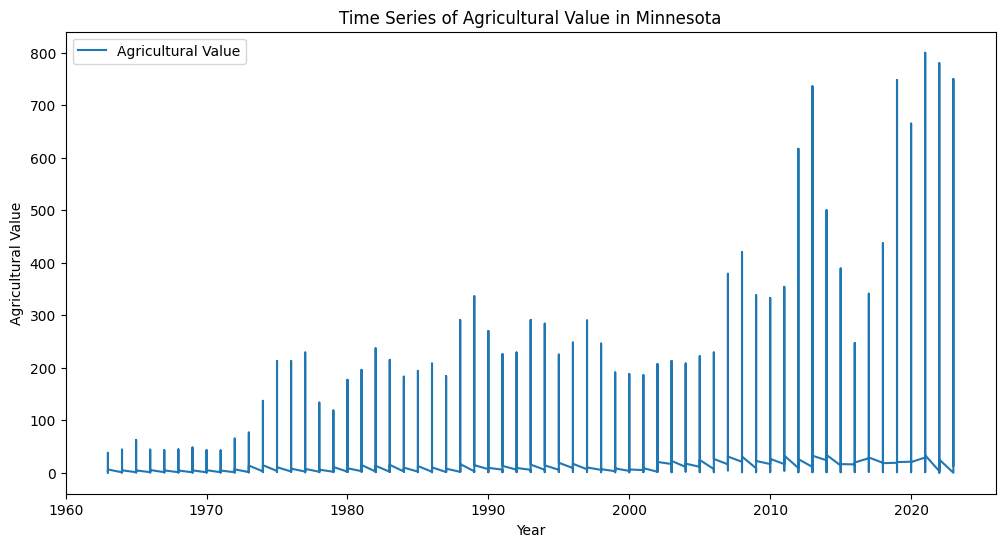

(0.010247552451062493,
 0.43605739063155974,
 -0.00720094170014572,
 0.5841710281640894,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Value   R-squared:                       0.000
 Model:                            OLS   Adj. R-squared:                 -0.000
 Method:                 Least Squares   F-statistic:                    0.6067
 Date:                Wed, 10 Jan 2024   Prob (F-statistic):              0.436
 Time:                        15:40:11   Log-Likelihood:                -34337.
 No. Observations:                5779   AIC:                         6.868e+04
 Df Residuals:                    5777   BIC:                         6.869e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      

In [2]:
from scipy.stats import pearsonr
import statsmodels.api as sm

# Function to calculate correlation and p-value


def calculate_correlation(df, col1, col2):
    correlation, p_value = pearsonr(df[col1], df[col2])
    return correlation, p_value

# Function for simple linear regression


def simple_linear_regression(df, predictor, response):
    X = sm.add_constant(df[predictor])  # Adding a constant for the intercept
    model = sm.OLS(df[response], X).fit()
    return model


# Function to clean the dataset by removing NaNs and infinite values in specific columns
def clean_data(df, columns):
    for col in columns:
        # Replace infinities with NaN
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    # Drop rows with NaNs in specified columns
    df.dropna(subset=columns, inplace=True)
    return df


# Columns to be cleaned
columns_to_clean = ['PRCP', 'TAVG', 'Value']

# Cleaning the merged dataset
merged_data_cleaned = clean_data(merged_data, columns_to_clean)

# Re-calculating correlations with the cleaned dataset
corr_pr_value, p_pr_value = calculate_correlation(
    merged_data_cleaned, 'PRCP', 'Value')
corr_tavg_value, p_tavg_value = calculate_correlation(
    merged_data_cleaned, 'TAVG', 'Value')

# Re-running simple Linear Regression with the cleaned dataset
model_prcp = simple_linear_regression(merged_data_cleaned, 'PRCP', 'Value')
model_tavg = simple_linear_regression(merged_data_cleaned, 'TAVG', 'Value')

# Re-plotting the Time Series Plot with cleaned data
plt.figure(figsize=(12, 6))
plt.plot(merged_data_cleaned['Year'],
         merged_data_cleaned['Value'], label='Agricultural Value')
plt.xlabel('Year')
plt.ylabel('Agricultural Value')
plt.title('Time Series of Agricultural Value in Minnesota')
plt.legend()
plt.show()

# Displaying the results
corr_pr_value, p_pr_value, corr_tavg_value, p_tavg_value, model_prcp.summary(
), model_tavg.summary()

      Year  Month  Commodity   Value
0     1960      2     BARLEY    0.84
1     1960      2       CORN    0.82
2     1960      2   FLAXSEED    3.06
3     1960      2        HAY   43.00
4     1960      2       OATS    0.60
5     1960      2        RYE    0.92
6     1960      2   SOYBEANS    1.89
7     1960      2      WHEAT    5.69
8     1960      3     BARLEY    0.83
9     1960      3       CORN    0.85
10    1960      3   FLAXSEED    2.92
11    1960      3        HAY   43.00
12    1960      3       OATS    0.61
13    1960      3        RYE    0.86
14    1960      3   SOYBEANS    1.89
15    1960      3      WHEAT    5.73
16    1960      4     BARLEY    0.84
17    1960      4       CORN    0.92
18    1960      4   FLAXSEED    3.04
19    1960      4        HAY   44.70
20    1960      4       OATS    0.61
21    1960      4        RYE    0.91
22    1960      4   SOYBEANS    1.92
23    1960      4      WHEAT    5.78
24    1960      5     BARLEY    0.84
25    1960      5       CORN    0.97
2

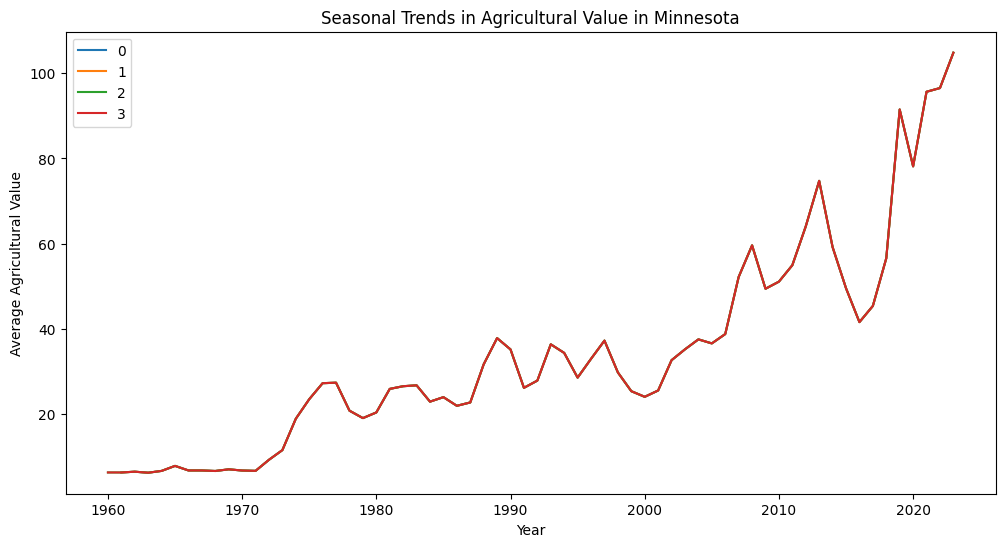

" plt.figure(figsize=(12, 6))\nseason_data = merged_seasonal_data[merged_seasonal_data['Season'] == 0]\navg_value_per_year = season_data.groupby(\n    'Year')['Value'].mean().reset_index()\nplt.plot(avg_value_per_year['Year'],\n         avg_value_per_year['Value'], label=0)\nplt.xlabel('Year')\nplt.ylabel('Average Agricultural Value')\nplt.title('Seasonal Trends in Agricultural Value in Minnesota')\nplt.legend()\nplt.show() "

In [27]:
# Function to categorize months into seasons
def month_to_season(month):
    if month in [3, 4, 5]:
        return 0 #'Spring'
    elif month in [6, 7, 8]:
        return 1 #'Summer'
    elif month in [9, 10, 11]:
        return 2 #'Fall'
    else:
        return 3 #'Winter'

def load_preprocess_climate_data_seasons(climate_data):
    climate_data['Season'] = climate_data['Month'].apply(month_to_season)
    # Selecting only numeric columns for mean calculation
    numeric_cols = climate_data.select_dtypes(include=[np.number]).columns
    climate_data_numeric = climate_data[numeric_cols]
    return climate_data_numeric

seasonal_data = load_preprocess_climate_data_seasons(climate_data).groupby(
    ['Year', 'Season']).mean().reset_index()
# print(seasonal_data.groupby(['Year', 'Season']).mean().reset_index())
print(agri_data.to_string())
merged_seasonal_data = pd.merge(
    agri_data, seasonal_data, how='left', on='Year')
#print(merged_seasonal_data.to_string())
plt.figure(figsize=(12, 6))
for season in [0, 1, 2, 3]:
    season_data = merged_seasonal_data[merged_seasonal_data['Season'] == season]
    avg_value_per_year = season_data.groupby(
        'Year')['Value'].mean().reset_index()
    plt.plot(avg_value_per_year['Year'],
             avg_value_per_year['Value'], label=season)
plt.xlabel('Year')
plt.ylabel('Average Agricultural Value')
plt.title('Seasonal Trends in Agricultural Value in Minnesota')
plt.legend()
plt.show()
""" plt.figure(figsize=(12, 6))
season_data = merged_seasonal_data[merged_seasonal_data['Season'] == 0]
avg_value_per_year = season_data.groupby(
    'Year')['Value'].mean().reset_index()
plt.plot(avg_value_per_year['Year'],
         avg_value_per_year['Value'], label=0)
plt.xlabel('Year')
plt.ylabel('Average Agricultural Value')
plt.title('Seasonal Trends in Agricultural Value in Minnesota')
plt.legend()
plt.show() """

Text(0.5, 1.0, 'Summer Trends in Agricultural Value in Minnesota')

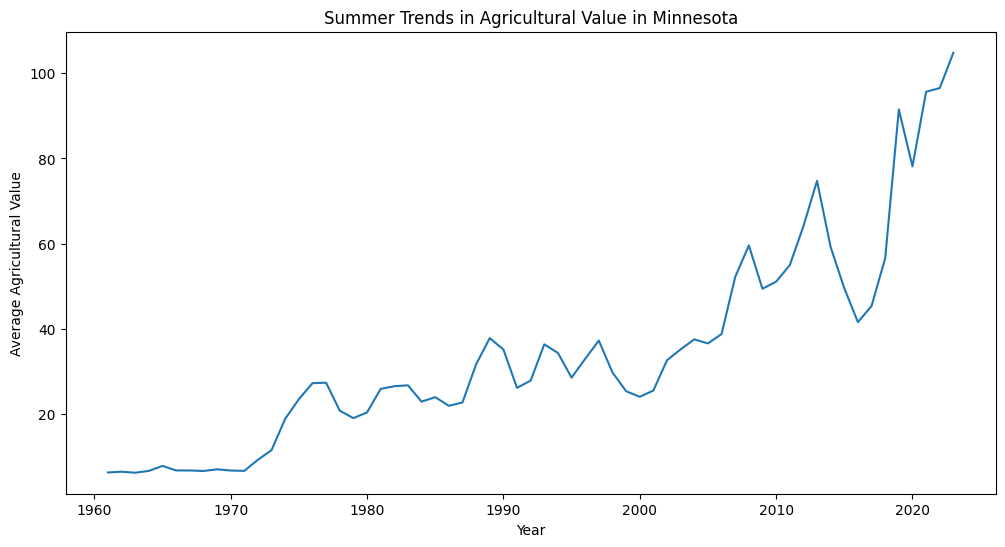

In [35]:
plt.figure(figsize=(12, 6))
season_data = merged_seasonal_data[merged_seasonal_data['Season'] == 1]
avg_value_per_year = season_data.groupby(
    'Year')['Value'].mean().reset_index()
plt.plot(avg_value_per_year['Year'],
         avg_value_per_year['Value'], label=1)
plt.xlabel('Year')
plt.ylabel('Average Agricultural Value')
plt.title('Summer Trends in Agricultural Value in Minnesota')

In [36]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [37]:
# Assuming 'aggregated_agri_data' is your loaded dataset
corn_data = agri_data[agri_data['Commodity'] == 'CORN']
corn_data['Date'] = pd.to_datetime(
    corn_data['Year'].astype(str) + '-' + corn_data['Month'].astype(str))
corn_ts = corn_data.set_index('Date')['Value']
corn_ts = corn_ts.dropna()

/var/folders/mp/144rqwkj1h5bn2pdhg3lm98c0000gn/T/ipykernel_4354/1370067715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_data['Date'] = pd.to_datetime(


In [38]:
train = corn_ts.iloc[:-100]
test = corn_ts.iloc[-100:]

In [39]:
model = ARIMA(train, order=(5, 1, 0))  # Example parameters
fitted_model = model.fit()

/Volumes/Passport/PersonalProjects/Facultate/Software Packages for Data Analysis/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Volumes/Passport/PersonalProjects/Facultate/Software Packages for Data Analysis/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Volumes/Passport/PersonalProjects/Facultate/Software Packages for Data Analysis/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
forecast = fitted_model.get_forecast(steps=100)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

/Volumes/Passport/PersonalProjects/Facultate/Software Packages for Data Analysis/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Volumes/Passport/PersonalProjects/Facultate/Software Packages for Data Analysis/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


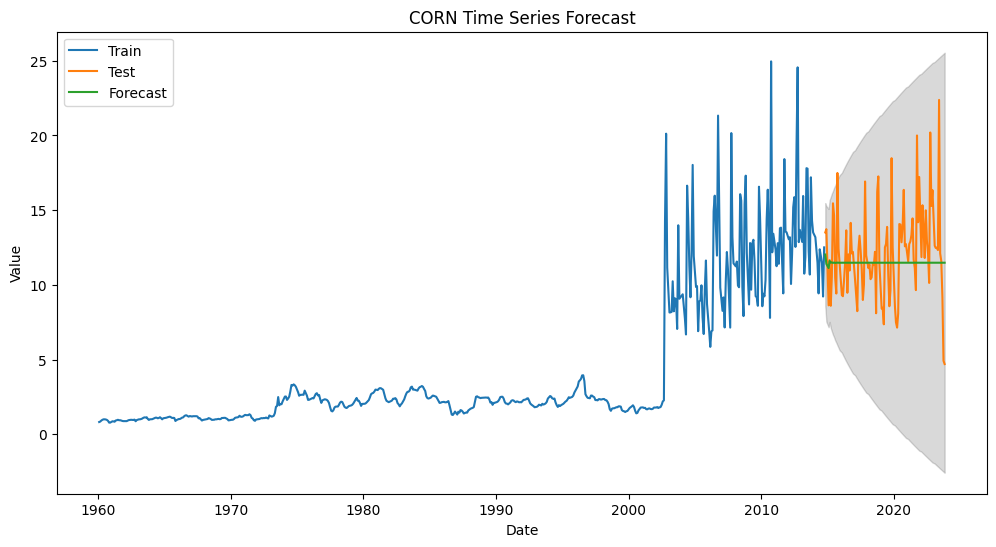

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_values, label='Forecast')
plt.fill_between(
    test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=.15)
plt.title('CORN Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()